<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [12]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [14]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [15]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [16]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


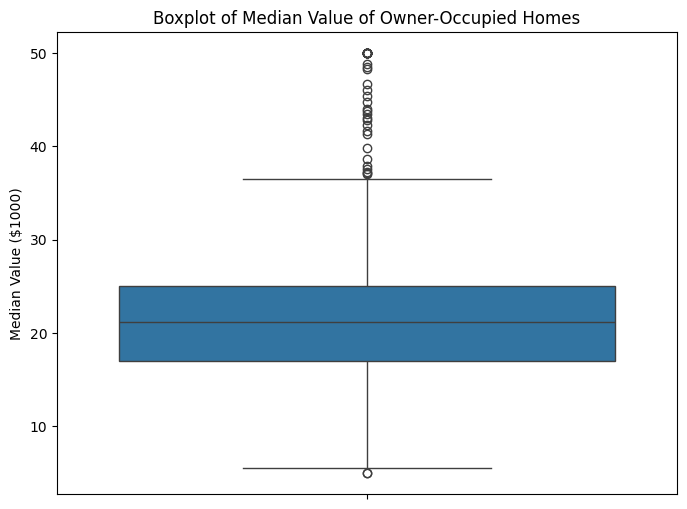

In [17]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.ylabel('Median Value ($1000)')
plt.show()

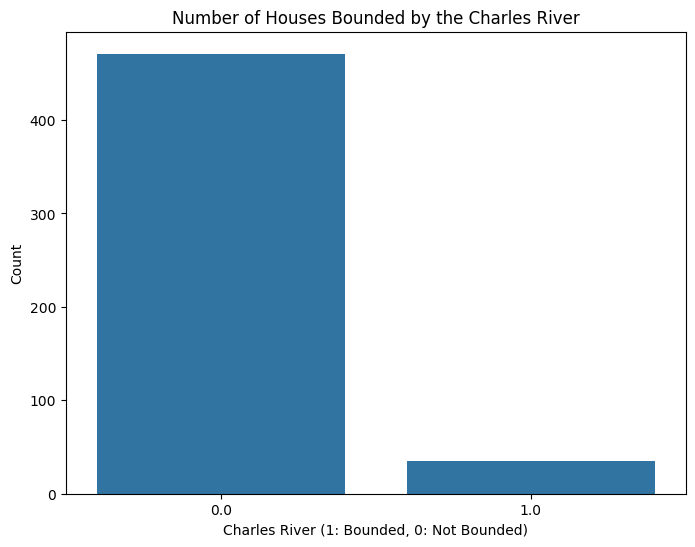

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Number of Houses Bounded by the Charles River')
plt.xlabel('Charles River (1: Bounded, 0: Not Bounded)')
plt.ylabel('Count')
plt.show()

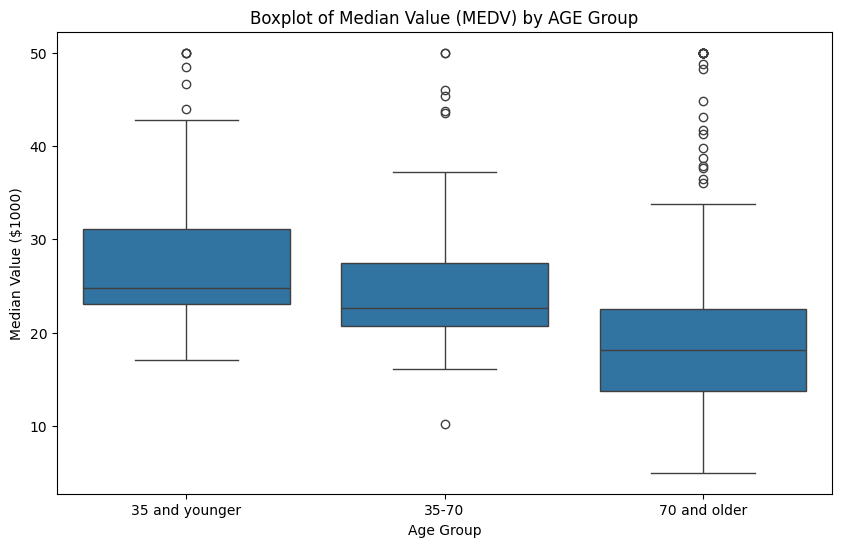

In [19]:
boston_df['AGE_Group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100], labels=['35 and younger', '35-70', '70 and older'])

plt.figure(figsize=(10, 6))
sns.boxplot(x=boston_df['AGE_Group'], y=boston_df['MEDV'])
plt.title('Boxplot of Median Value (MEDV) by AGE Group')
plt.xlabel('Age Group')
plt.ylabel('Median Value ($1000)')
plt.show()

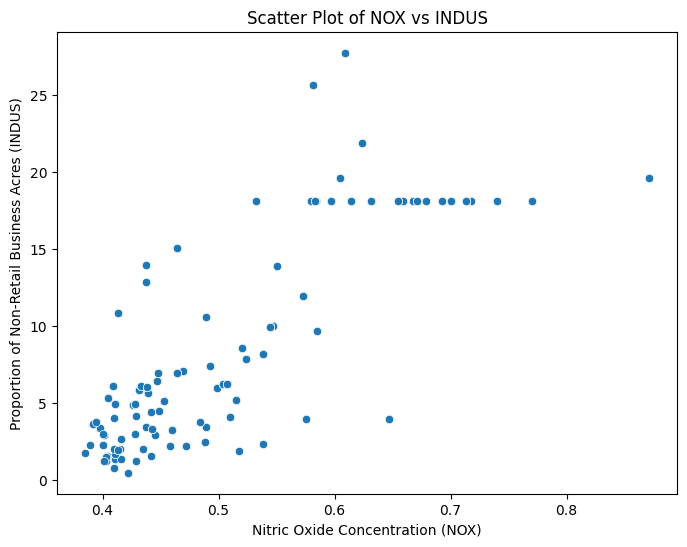

In [20]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])
plt.title('Scatter Plot of NOX vs INDUS')
plt.xlabel('Nitric Oxide Concentration (NOX)')
plt.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
plt.show()

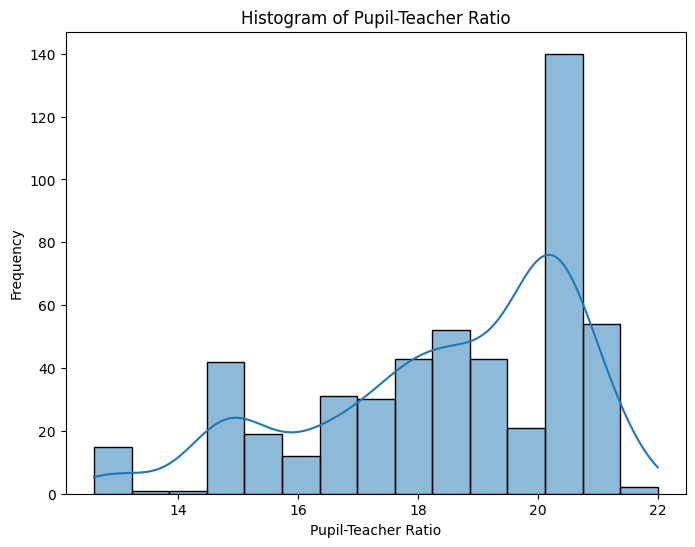

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(boston_df['PTRATIO'], kde=True, bins=15)
plt.title('Histogram of Pupil-Teacher Ratio')
plt.xlabel('Pupil-Teacher Ratio')
plt.ylabel('Frequency')
plt.show()

In [25]:
chas_1 = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_0 = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = stats.ttest_ind(chas_1, chas_0)

print(f"T-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median home values.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median home values.")


T-statistic: 3.9964, P-value: 0.0001
Reject the null hypothesis: There is a significant difference in median home values.


In [27]:
anova_result = ols('MEDV ~ C(AGE_Group)', data=boston_df).fit()
anova_table = sm.stats.anova_lm(anova_result, typ=2)
print(anova_table)

if anova_table['PR(>F)'][0] < 0.05:
    print("Reject the null hypothesis: There is a significant difference in median home values across age groups.")
else:
    print("Fail to reject the null hypothesis: No significant difference in median home values.")


                    sum_sq     df         F        PR(>F)
C(AGE_Group)   5401.731883    2.0  36.40765  1.710501e-15
Residual      37314.563532  503.0       NaN           NaN


<ipython-input-27-cc4fa350b3b8>:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if anova_table['PR(>F)'][0] < 0.05:


Reject the null hypothesis: There is a significant difference in median home values across age groups.


In [28]:
correlation, p_value = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(f"Correlation Coefficient: {correlation:.4f}, P-value: {p_value:.4f}")

if p_value < 0.05:
    print("Reject the null hypothesis: There is a significant correlation.")
else:
    print("Fail to reject the null hypothesis: No significant correlation.")


Correlation Coefficient: 0.7637, P-value: 0.0000
Reject the null hypothesis: There is a significant correlation.


In [29]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

print(model.summary())

if model.pvalues['DIS'] < 0.05:
    print("Reject the null hypothesis: Distance has a significant impact on median home values.")
else:
    print("Fail to reject the null hypothesis: No significant impact.")


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 03 Dec 2024   Prob (F-statistic):           1.21e-08
Time:                        13:51:16   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(y=boston_df['MEDV'])
plt.title('Boxplot of Median Value of Owner-Occupied Homes (MEDV)')
plt.ylabel('Median Value (in $1000s)')
plt.xlabel('')
plt.show()



The boxplot above shows the distribution of the median value of owner-occupied homes (MEDV) in the dataset. 
It highlights the median, interquartile range, and potential outliers in the data. This visualization helps 
to understand the spread and central tendency of home values.


In [ ]:

plt.figure(figsize=(8, 6))
sns.countplot(x=boston_df['CHAS'])
plt.title('Number of Houses Bounded by Charles River (CHAS)')
plt.ylabel('Number of Houses')
plt.xlabel('CHAS (1: Tract bounds river; 0: Does not)')
plt.show()



The barplot displays the number of houses that are bounded by the Charles River (CHAS = 1) versus those that are not (CHAS = 0). 
This plot provides insight into the distribution of houses near the river in the dataset.


In [ ]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=pd.cut(boston_df['AGE'], bins=[0, 35, 70, 100]), y=boston_df['MEDV'])
plt.title('Boxplot of MEDV by Age Group of Houses')
plt.xlabel('Age Group of Houses')
plt.ylabel('Median Value (in $1000s)')
plt.show()



The boxplot above compares the median value of owner-occupied homes (MEDV) across different age groups of houses. 
It categorizes the houses into three age groups: 35 years and younger, 36-70 years, and older than 70 years.



The scatter plot below examines the relationship between Nitric oxide concentration (NOX) and the proportion of 
non-retail business acres per town (INDUS). This visualization helps to assess whether higher industrial activity correlates 
with increased NOX concentrations.



The histogram below illustrates the distribution of the pupil-to-teacher ratio (PTRATIO) across the dataset. 
It helps to identify the central tendency and spread of PTRATIO values.
